# ENTREGA PRÀCTICA 1 EQUACIONS DIFERENCIALS

## Víctor Ballester
## NIU: 1570866

### 1 - Població mundial

##### Dades i models necessaris

In [227]:
X=[1950,1955,..,2005]
X

[1950, 1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005]

In [228]:
Y=[2.535093,2.770753,3.031931,3.342771,3.698676,4.076080,4.451470,4.855264,5.294879, 5.719045,6.124123,6.514751]
Y

[2.53509300000000,
 2.77075300000000,
 3.03193100000000,
 3.34277100000000,
 3.69867600000000,
 4.07608000000000,
 4.45147000000000,
 4.85526400000000,
 5.29487900000000,
 5.71904500000000,
 6.12412300000000,
 6.51475100000000]

In [229]:
def model_malthus(X,Y):
    # definició de variables necessàries
    var('a0 p t')
    p=function('p')(t)
    # creació dels conjunts necessaris 
    dY=[(Y[i+1]-Y[i])/(X[i+1]-X[i]) for i in range(0,len(X)-1)] # derivades discretes
    TC=[dY[i]/Y[i] for i in range(0,len(dY))] # taxa de creixement
    # aproximació per una recta del model
    a0=mean(TC)
    # solucionem la edo p'=a*p
    ode_sol=desolve(diff(p,t)-a0*p,[p,t],[X[0],Y[0]])
    return ode_sol

In [230]:
def model_verhulst(X,Y):
    # definició de variables necessàries
    var('a b p t')
    # creació dels conjunts necessaris 
    dY=[(Y[i+1]-Y[i])/(X[i+1]-X[i]) for i in range(0,len(X)-1)] # derivades discretes
    TC=[dY[i]/Y[i] for i in range(0,len(dY))] # taxa de creixement
    # recta de regressió del model
    taulaVerhulst=[[Y[i],TC[i]] for i in range(0,len(TC))]
    model(p)=a*p+b
    valorsrecta=find_fit(taulaVerhulst,model)
    # solucionem la edo p'=a*p+b manualment
    integral1=integrate(1/(p*(a*p+b)),p) # integral1 = -log(a*p + b)/b + log(p)/b
    edo_lhs=integral1.simplify_real() # edo_lhs = log(p/(a*p + b))/b
    edo_rhs=t-X[0]+integral1.subs(p=Y[0]) # edo_rhs = t - X[0] + (-log(a*Y[0] + b)/b + log(Y[0])/b)
    P=solve(exp(b*edo_lhs)-exp(b*edo_rhs),p)[0].rhs() # P = solució de la edo en funcio de t, a i b
    # substituim els valors a i b
    P_mod=P.subs(a=valorsrecta[0].rhs(),b=valorsrecta[1].rhs())
    return P_mod

##### Model Malthus

In [231]:
p_mod1=model_malthus(X,Y)
p_mod1

2535093/1000000*e^(2298657/128178989*t - 4482381150/128178989)

##### Model Verhulst 1

In [232]:
p_mod2=model_verhulst(X,Y)
p_mod2

-25564.91139999467*e^(0.025564911399994672*t - 48.92134690722886)/(-1828.9516293534643*e^(0.025564911399994672*t - 48.92134690722886) - 20928.34892708211)

##### Model Verhulst 2

In [233]:
XX=[X[i] for i in range(3,len(X))]
XX

[1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005]

In [234]:
YY=[Y[i] for i in range(3,len(Y))]
YY

[3.34277100000000,
 3.69867600000000,
 4.07608000000000,
 4.45147000000000,
 4.85526400000000,
 5.29487900000000,
 5.71904500000000,
 6.12412300000000,
 6.51475100000000]

In [235]:
p_mod3=model_verhulst(XX,YY)
p_mod3

-31161.51428854692*e^(0.03116151428854692*t - 60.025575473249155)/(-2927.8249856272846*e^(0.03116151428854692*t - 60.025575473249155) - 21374.465833516617)

##### Comparació de dades

In [236]:
X=[1950,1955,..,2020]
X

[1950,
 1955,
 1960,
 1965,
 1970,
 1975,
 1980,
 1985,
 1990,
 1995,
 2000,
 2005,
 2010,
 2015,
 2020]

In [237]:
Y_revisat=[2.53643101800000,
 2.77301991500000,
 3.03494971500000,
 3.33958351000000,
 3.70043704200000,
 4.07948047400000,
 4.45800346600000,
 4.87092166600000,
 5.32723104100001,
 5.74421293000000,
 6.14349380600000,
 6.54190695600000,
 6.95682358800000,
 7.37979696700000,
 7.79479872900000] # 1950-2020
Y_revisat

[2.53643101800000,
 2.77301991500000,
 3.03494971500000,
 3.33958351000000,
 3.70043704200000,
 4.07948047400000,
 4.45800346600000,
 4.87092166600000,
 5.32723104100001,
 5.74421293000000,
 6.14349380600000,
 6.54190695600000,
 6.95682358800000,
 7.37979696700000,
 7.79479872900000]

In [238]:
print("Previsió i predicció de les dades segons els 3 models proposats juntament amb les dades revisades\n")
print("  t      p_mod1(t)        p_mod2(t)        p_mod3(t)   Dades revisades")
for i in range(0,len(X)):
    if i < 3:
        print(X[i],(p_mod1(X[i])).n(),(p_mod2(X[i])).n(),"                ",Y_revisat[i].n(digits=11))        
    else:
        print(X[i],(p_mod1(X[i])).n(),(p_mod2(X[i])).n(),(p_mod3(X[i])).n(),Y_revisat[i].n(digits=11))

Previsió i predicció de les dades segons els 3 models proposats juntament amb les dades revisades

  t      p_mod1(t)        p_mod2(t)        p_mod3(t)   Dades revisades
1950 2.53509300000000 2.53509300000000                  2.5364310180
1955 2.77290699716892 2.81124101674352                  2.7730199150
1960 3.03303003674751 3.10929616209194                  3.0349497150
1965 3.31755490292493 3.42924745385521 3.34277100000001 3.3395835100
1970 3.62877070143485 3.77069991597696 3.70991388762926 3.7004370420
1975 3.96918127624126 4.13283078595673 4.09476339729176 4.0794804740
1980 4.34152535387114 4.51435853010752 4.49366061689161 4.4580034660
1985 4.74879857746266 4.91352911941334 4.90232616917621 4.8709216660
1990 5.19427760780059 5.32812335409121 5.31602925018475 5.3272310410
1995 5.68154648524061 5.75548777188831 5.72979985667663 5.7442129300
2000 6.21452546461379 6.19258988776336 6.13866474950740 6.1434938060
2005 6.79750255509838 6.63609635459427 6.53788374205270 6.5419069560
20

Com podem observar, el model de Verhulst 2 (p_mod3(t)) aproxima millor les dades revisades en comparació amb els altres dos models. D'altra banda, el pitjor model és el de Malthus.

##### Models amb dades noves (revisades)

In [239]:
p_mod1_rev=model_malthus(X,Y_revisat) 
p_mod1_rev # Malthus

112345855/44292888*e^(2506709/149874254*t - 2444041275/74937127)

In [240]:
p_mod2_rev=model_verhulst(X,Y_revisat)
p_mod2_rev # Verhulst 1

-1162458.1085039717*e^(0.026244802743591065*t - 50.24660736808994)/(-88253.91070845613*e^(0.026244802743591065*t - 50.24660736808994) - 938608.1519232412)

In [241]:
p_mod3_rev=model_verhulst([X[i] for i in range(3,len(X))],[Y_revisat[i] for i in range(3,len(Y_revisat))])
p_mod3_rev # Verhulst 2

-402739.671381065*e^(0.030143269442014124*t - 58.025678351949324)/(-35384.74188064183*e^(0.030143269442014124*t - 58.025678351949324) - 284569.3708908671)

In [242]:
print("Predicció de la població mundial durant els anys 2010-2050 segons els 3 models proposats\n")
print("  t    p_mod1_rev(t)    p_mod2_rev(t)    p_mod3_rev(t)")
for i in [2010,2015,..,2055]:
        print(i,(p_mod1_rev(i)).n(),(p_mod2_rev(i)).n(),(p_mod3_rev(i)).n())

Predicció de la població mundial durant els anys 2010-2050 segons els 3 models proposats

  t    p_mod1_rev(t)    p_mod2_rev(t)    p_mod3_rev(t)
2010 6.91908021227688 7.05028120946746 7.02458060891574
2015 7.52258564994744 7.47765447309129 7.42210629496517
2020 8.17873086084273 7.89751138297778 7.80184681081237
2025 8.89210726295535 8.30655239615966 8.16097243971013
2030 9.66770675319128 8.70182534352205 8.49739048169768
2035 10.5109566384871 9.08080032861117 8.80974323651791
2040 11.4277576137369 9.44141846461902 9.09736387954260
2045 12.4245250522808 9.78211387818195 9.36020099894282
2050 13.5082338978902 10.1018107624733 9.59872348977587
2055 14.6864674723815 10.3998990754082 9.81381676275077


##### Quan arribarem als 8 mil milions?

Utilitzarem el model p_mod3_rev, que sembla ser el que dona millors resultats.

In [243]:
sol=solve(p_mod3_rev==8,t) # solucionem la equació
Any=sol[0].rhs().n()
Any

2022.72113085611

In [244]:
mes=(Any-Any.integer_part())*12+1
mes

9.65357027329264

In [245]:
dia=(mes-mes.integer_part())*(365.25/12) # fem la mitjana de dies que té cada mes.
dia

19.8930451933448

In [246]:
print("Arribarem a 8 milions d'habitans el dia",dia.integer_part(),"del mes",mes.integer_part(),"de l'any",Any.integer_part(),"\b.")

Arribarem a 8 milions d'habitans el dia 19 del mes 9 de l'any 2022 .


### 2 - Cas particular d'un país concret

In [247]:
linia_excel=1570866 % 263 + 42
linia_excel

272

272 ----> Sweden

##### Dades i models necessaris

In [248]:
X_sweden=[1950,1955,..,2020]
X_sweden

[1950,
 1955,
 1960,
 1965,
 1970,
 1975,
 1980,
 1985,
 1990,
 1995,
 2000,
 2005,
 2010,
 2015,
 2020]

In [249]:
Y_sweden=[7.00991300000000,
 7.26262500000000,
 7.48253600000000,
 7.74567800000000,
 8.05490900000000,
 8.19734100000000,
 8.31633100000000,
 8.35765000000000,
 8.56737500000000,
 8.83642100000000,
 8.88164200000000,
 9.03862700000000,
 9.39015700000000,
 9.76494900000000,
 10.0992700000000] # població a Suència (1950-2020) expressada en milions d'habitans
Y_sweden

[7.00991300000000,
 7.26262500000000,
 7.48253600000000,
 7.74567800000000,
 8.05490900000000,
 8.19734100000000,
 8.31633100000000,
 8.35765000000000,
 8.56737500000000,
 8.83642100000000,
 8.88164200000000,
 9.03862700000000,
 9.39015700000000,
 9.76494900000000,
 10.0992700000000]

##### Models amb dades 1950-2020

In [250]:
p_mod1_sweden=model_malthus(X_sweden,Y_sweden) 
p_mod1_sweden # Malthus

7009913/1000000*e^(905347/170857051*t - 1765426650/170857051)

In [251]:
p_mod2_sweden=model_verhulst(X_sweden,Y_sweden)
p_mod2_sweden # Verhulst 1

-6899.890216924324*e^(0.006899890216924324*t - 11.507460632874604)/(-191.73046825838406*e^(0.006899890216924324*t - 11.507460632874604) - 5555.8763149837905)

Ara eliminarem unes quantes dades pel model de Verhulst 2.

Història de Suècia:
- No va participar en la WWII i es va declerar neutral a la Guerra Freda. Per tant, no va ser afectada de manera substancial per les guerres.
- Va tenir fortes onades d'immigració i emmigració durant la dècada dels anys 70, 80 i 90. Per tant, exclourem els valors més desorbitats d'aquestes dades.

Observem el gràfic de la taxa de creixement en funció dels anys per tal de decir quines dades descartem (si és que en descartem algunes).

In [252]:
dY_sweden=[(Y_sweden[i+1]-Y_sweden[i])/(X_sweden[i+1]-X_sweden[i]) for i in range(0,len(X_sweden)-1)] # derivades discretes
TC_sweden=[dY_sweden[i]/Y_sweden[i] for i in range(0,len(dY_sweden))] # taxa de creixement

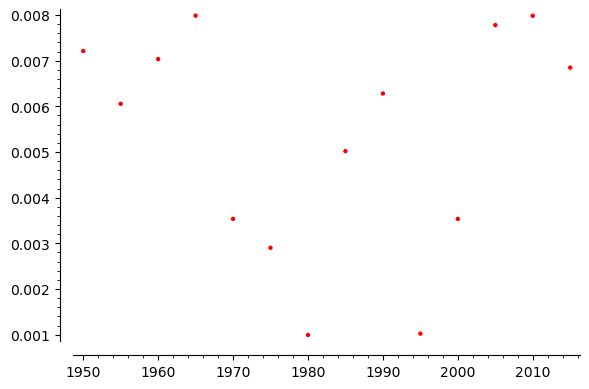

In [253]:
graf5=points([[X_sweden[i],TC_sweden[i]] for i in range(0,len(TC_sweden))],color='red')
graf5

Exclourem les dades dels anys 1980 i 1995.

In [254]:
X_sweden_verhulst=[1950,
                   1955,
                   1960,
                   1965,
                   1970,
                   1975,
                   1985,
                   1990,
                   2000,
                   2005,
                   2010,
                   2015,
                   2020]

In [255]:
Y_sweden_verhulst=[7.00991300000000,
 7.26262500000000,
 7.48253600000000,
 7.74567800000000,
 8.05490900000000,
 8.19734100000000,
 8.35765000000000,
 8.56737500000000,
 8.88164200000000,
 9.03862700000000,
 9.39015700000000,
 9.76494900000000,
 10.0992700000000] # població a Suència (1950-2020) expressada en milions d'habitans

A més, canviarem el valor inicial de la edo per obtenir una millor aproximació de cara a l'any 2050.

In [256]:
def model_verhulst_sweden(X,Y): # igual que model_verhulst(X,Y) pero canviant les condicions inicials
    # definició de variables necessàries
    var('a b p t')
    # creació dels conjunts necessaris 
    dY=[(Y[i+1]-Y[i])/(X[i+1]-X[i]) for i in range(0,len(X)-1)] # derivades discretes
    TC=[dY[i]/Y[i] for i in range(0,len(dY))] # taxa de creixement
    # recta de regressió del model
    taulaVerhulst=[[Y[i],TC[i]] for i in range(0,len(TC))]
    model(p)=a*p+b
    valorsrecta=find_fit(taulaVerhulst,model)
    # solucionem la edo p'=a*p+b manualment
    integral1=integrate(1/(p*(a*p+b)),p) # integral1 = -log(a*p + b)/b + log(p)/b
    edo_lhs=integral1.simplify_real() # edo_lhs = log(p/(a*p + b))/b
    edo_rhs=t-X[8]+integral1.subs(p=Y[8]) # edo_rhs = t - X[0] + (-log(a*Y[0] + b)/b + log(Y[0])/b)
    P=solve(exp(b*edo_lhs)-exp(b*edo_rhs),p)[0].rhs() # P = solució de la edo en funcio de t, a i b
    # substituim els valors a i b
    P_mod=P.subs(a=valorsrecta[0].rhs(),b=valorsrecta[1].rhs())
    return P_mod 

In [257]:
p_mod3_sweden=model_verhulst_sweden(X_sweden_verhulst,Y_sweden_verhulst)
p_mod3_sweden # Verhulst 2

-2806.7892987509954*e^(0.005613578597501991*t - 9.043170745183726)/(6.234419723732891*e^(0.005613578597501991*t - 9.043170745183726) - 2862.16118281493)

In [258]:
i=2050
print("Predicció de la població al 2050 a Suècia segons els 3 models proposats:\n")
print("        p_mod1_sweden(t)    p_mod2_sweden(t)    p_mod3_sweden(t)")
print(i,"  ",(p_mod1_sweden(i)).n(),"  ",(p_mod2_sweden(i)).n(),"  ",(p_mod3_sweden(i)).n())

Predicció de la població al 2050 a Suècia segons els 3 models proposats:

        p_mod1_sweden(t)    p_mod2_sweden(t)    p_mod3_sweden(t)
2050    11.9080059509920    11.7091951313169    11.8352016202927


##### Quina població hi havia a Suècia el dia del meu naixement?

In [259]:
# Dia de naixement
dia=26
mes=10
Any=2001

In [260]:
# Dia de naixement (transformat en anys)
Mes=(mes-1)+dia/(365.25/12)
Naixement=Any+Mes/12
Naixement

2001.82118412047

In [261]:
i=2001
print("Població al",dia,"del",mes,"del",Any,"a Suècia segons els 3 models proposats:\n")
print("        p_mod1_sweden(t)    p_mod2_sweden(t)    p_mod3_sweden(t)")
print(i,"  ",(p_mod1_sweden(i)).n(),"  ",(p_mod2_sweden(i)).n(),"  ",(p_mod3_sweden(i)).n())

Població al 26 del 10 del 2001 a Suècia segons els 3 models proposats:

        p_mod1_sweden(t)    p_mod2_sweden(t)    p_mod3_sweden(t)
2001    9.18495641153740    9.20978760426868    8.93263201309254


In [262]:
print("Recordem que:\n")
print("Població de Suècia l'any",X_sweden[10],"\b:",Y_sweden[10])
print("Població de Suècia l'any",X_sweden[11],"\b:",Y_sweden[11])

Recordem que:

Població de Suècia l'any 2000 : 8.88164200000000
Població de Suècia l'any 2005 : 9.03862700000000


Per tant, concloem que el valor més adecuat és el del tercer model (ja que en tot moment a gran escala, la població va ser creixent).